In [525]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf

# Считывание данных
Данные взяты с https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29
Все данные уже нормализованы.

Age (Real) is age of participant and has one of the values:

| Value | Meaning | Cases | Fraction |
| --- | --- | --- | --- |
|-0.95197| 18-24| 643| 34.11%|
|-0.07854 |25-34 |481| 25.52%|
|0.49788| 35-44| 356| 18.89%|
|1.09449| 45-54| 294| 15.60%|
|1.82213| 55-64| 93| 4.93%|
|2.59171| 65+| 18| 0.95%|

Gender:
- 0.48246 Female
- -0.48246 Male


Education:
- -2.43591 Left school before 16 years
- -1.73790 Left school at 16 years
- -1.43719 Left school at 17 years
- -1.22751 Left school at 18 years 
- -0.61113 Some college or university, no certificate or degree
- -0.05921 Professional certificate/ diploma 
- 0.45468 University degree 
- 1.16365 Masters degree 
- 1.98437 Doctorate degree 

Country:
- -0.09765 Australia 54 2.86%
- 0.24923 Canada 87 4.62%
- -0.46841 New Zealand 5 0.27%
- -0.28519 Other 118 6.26%
- 0.21128 Republic of Ireland 20 1.06%
- 0.96082 UK 1044 55.38%
- -0.57009 USA 557 29.55%

Ethnicity:
- -0.50212 Asian 26 1.38%
- -1.10702 Black 33 1.75%
- 1.90725 Mixed-Black/Asian 3 0.16%
- 0.12600 Mixed-White/Asian 20 1.06%
- -0.22166 Mixed-White/Black 20 1.06%
- 0.11440 Other 63 3.34%
- -0.31685 White 1720 91.25%

Результаты психологических тестов. Чем больше число, тем выше характеристика.
- Nscore is NEO-FFI-R Neuroticism
- Escore - (Real) is NEO-FFI-R Extraversion
- Oscore - (Real) is NEO-FFI-R Openness to experience
- Ascore - (Real) is NEO-FFI-R Agreeableness
- Cscore - (Real) is NEO-FFI-R Conscientiousness
- Impulsive - (Real) is impulsiveness measured by BIS-11
- SS - (Real) is sensation seeing measured by ImpSS

Дальше столбцы по веществам <br>
Условные обозначения в этих столбцах:
- CL0 Never Used 
- CL1 Used over a Decade Ago 
- CL2 Used in Last Decade 
- CL3 Used in Last Year
- CL4 Used in Last Month 
- CL5 Used in Last Week 
- CL6 Used in Last Day

In [526]:
data = pd.read_csv('drug_consumption.data')

In [527]:
data.head(10)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [23]:
#Убраны лишние вещества (кроме шоколада, алкоголя, кофеина и никотина)
work_data = data.drop(['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD','Mushrooms', 'Semer', 'VSA'], axis=1)
work_data.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Caff', 'Choc', 'Meth', 'Nicotine'],
      dtype='object')

In [24]:
#Убраны лишние вещества (кроме шоколада, алкоголя, кофеина и никотина) и псилохологические тесты
simple_data = data.drop(['Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS',
       'Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD','Mushrooms',
       'Semer', 'VSA'], axis=1)
simple_data.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Alcohol',
       'Caff', 'Choc', 'Meth', 'Nicotine'],
      dtype='object')

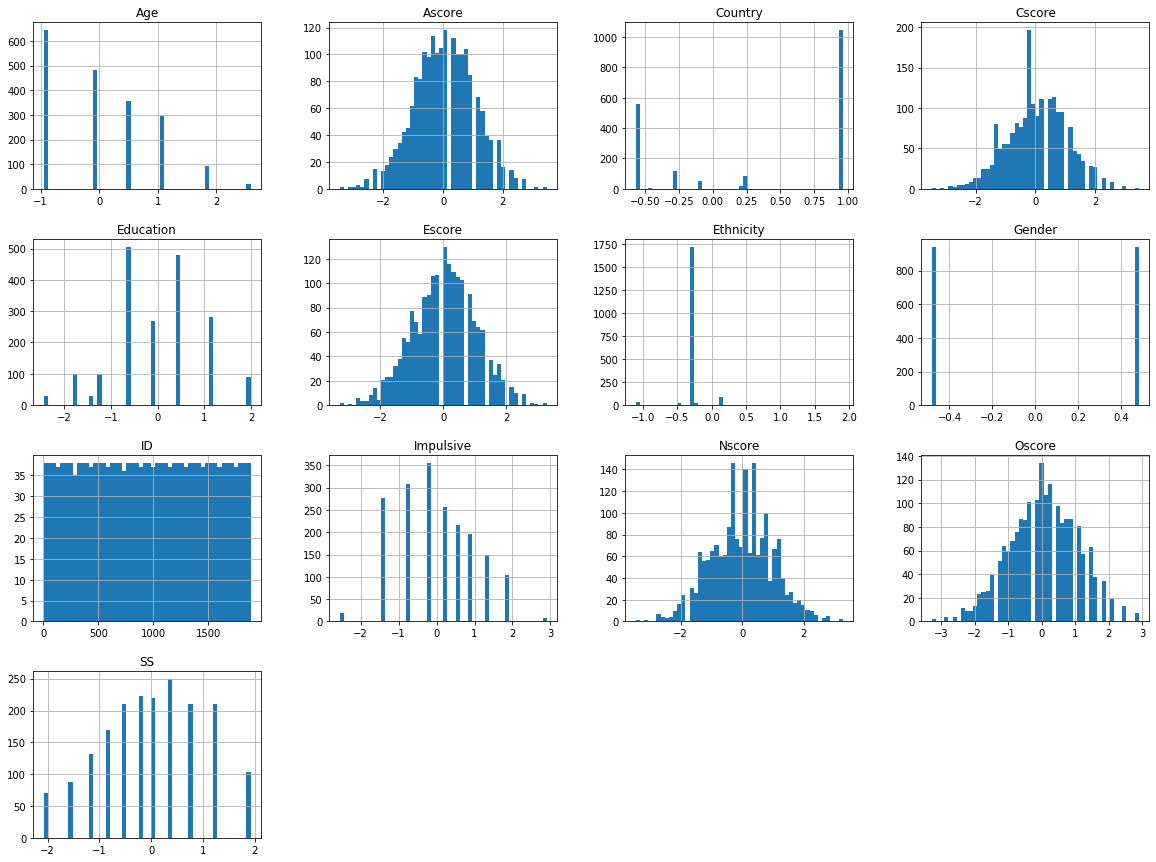

In [25]:
import matplotlib.pyplot as plt

work_data.hist(bins=50, figsize=(20 ,15))
plt.show()

CL0    1429
CL3     149
CL2      97
CL6      73
CL4      50
CL5      48
CL1      39
Name: Meth, dtype: int64


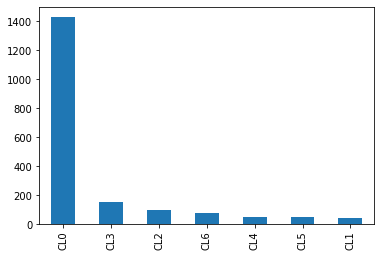

CL6    807
CL5    683
CL4    296
CL3     54
CL0     32
CL2     10
CL1      3
Name: Choc, dtype: int64


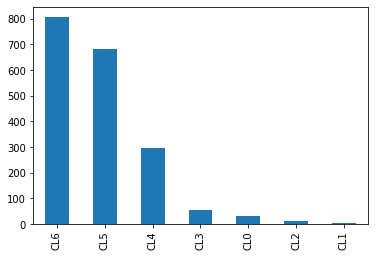

CL6    1385
CL5     273
CL4     106
CL3      60
CL0      27
CL2      24
CL1      10
Name: Caff, dtype: int64


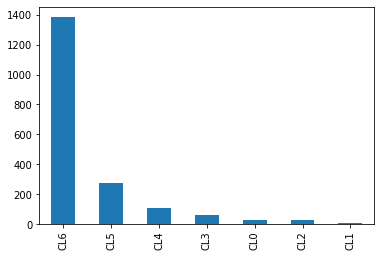

CL6    610
CL0    428
CL2    204
CL1    193
CL3    185
CL5    157
CL4    108
Name: Nicotine, dtype: int64


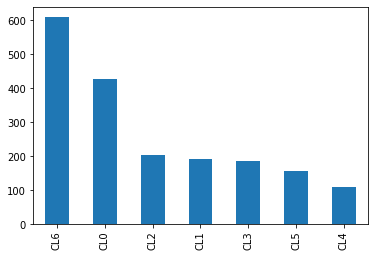

CL5    759
CL6    505
CL4    287
CL3    198
CL2     68
CL0     34
CL1     34
Name: Alcohol, dtype: int64


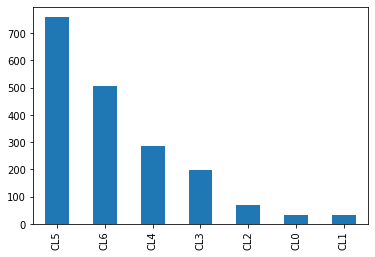

In [26]:
print(work_data['Meth'].value_counts())
work_data['Meth'].value_counts().plot(kind='bar')
plt.show()
print(work_data['Choc'].value_counts())
work_data['Choc'].value_counts().plot(kind='bar')
plt.show()
print(work_data['Caff'].value_counts())
work_data['Caff'].value_counts().plot(kind='bar')
plt.show() 
print(work_data['Nicotine'].value_counts())
work_data['Nicotine'].value_counts().plot(kind='bar')
plt.show()
print(work_data['Alcohol'].value_counts())
work_data['Alcohol'].value_counts().plot(kind='bar')
plt.show()

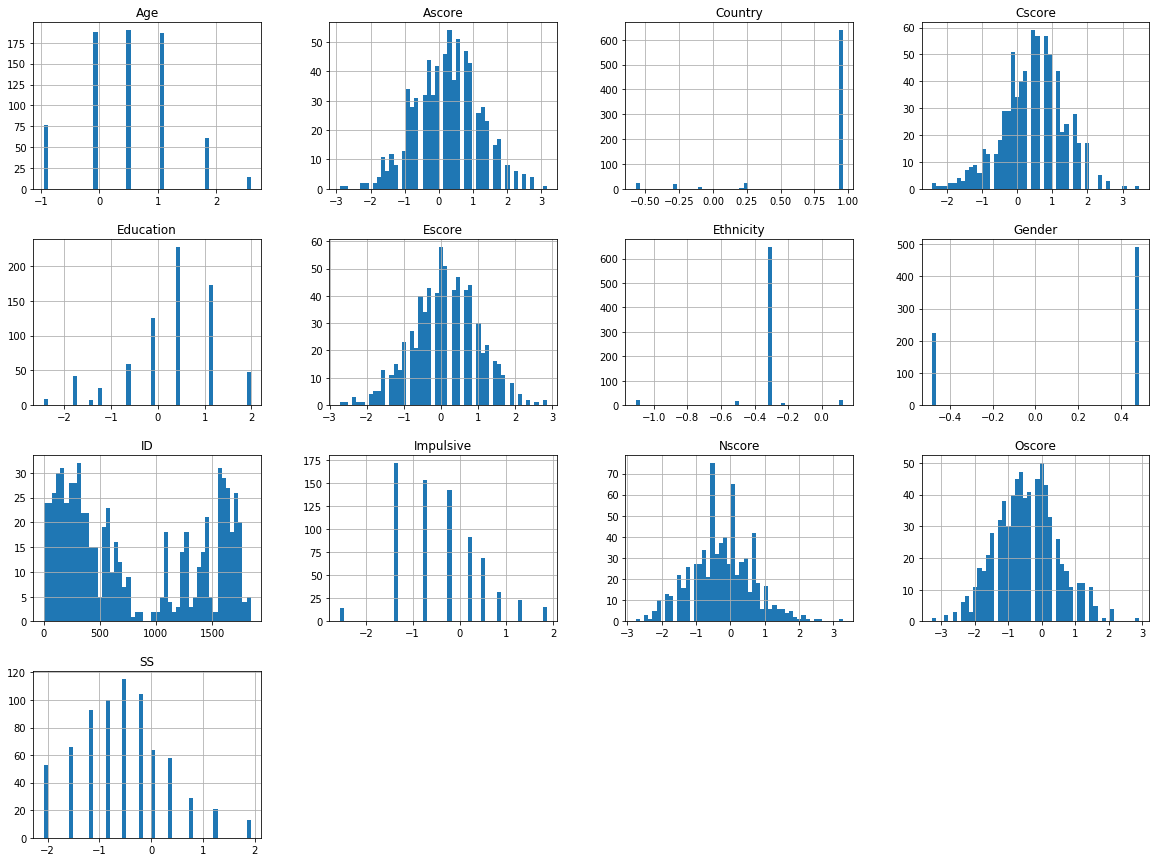

In [27]:
#Люди, которые использовали нелегальные вещества кроме мета более 10 лет назад или не использовавшие их вообще
healthy_or_meth = data
drugs = ['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD','Mushrooms',
       'Semer', 'VSA']
for i in drugs:
    healthy_or_meth = healthy_or_meth[(healthy_or_meth[i] == 'CL0') | (healthy_or_meth[i] == 'CL1') | (healthy_or_meth[i] == 'CL2')]
    

healthy_or_meth.hist(bins=50, figsize=(20 ,15))
plt.show()

CL0    694
CL1     13
CL2      9
Name: Heroin, dtype: int64


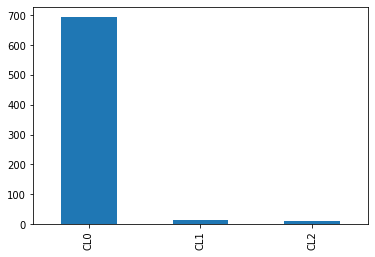

CL0    662
CL1     45
CL2      9
Name: VSA, dtype: int64


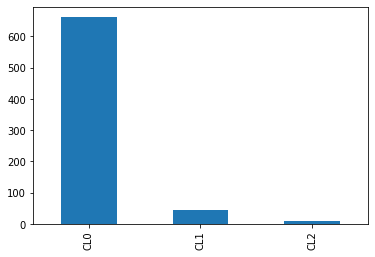

In [28]:
print(healthy_or_meth['Heroin'].value_counts())
healthy_or_meth['Heroin'].value_counts().plot(kind='bar')
plt.show()
print(healthy_or_meth['VSA'].value_counts())
healthy_or_meth['VSA'].value_counts().plot(kind='bar')
plt.show()

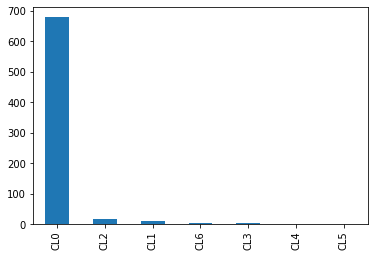

In [29]:
healthy_or_meth['Meth'].value_counts().plot(kind='bar')
plt.show()
#отсюда предположение: кто употреблял мет перешли на него с других веществ, или употребляет на ходу с другими веществами.
#для данного набора данных нет смысла делать модели. Слишком мало примеров людей использующих вещества

In [1]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameToNumPy(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, Х, y=None):
        return self
    
    def transform(self, Х):
        return X[self.attribute_names].values
    

In [533]:
def apply_pipeline(data, num_attributes, cat_attributes, encoder='ordinal'):
    X = data
    
    num_data_pipeline = Pipeline([
        ('selector', DataFrameToNumPy(num_attributes)),
    ])

    cat_data_pipeline = Pipeline([
        ('select', DataFrameToNumPy(cat_attributes)),
        ('cat_encode', OrdinalEncoder()),
    ])

    all_together = FeatureUnion(transformer_list=[
        ('num_pipe', num_data_pipeline),
        ('cat_pipe', cat_data_pipeline),
    ])

    
    return all_together.fit_transform(data)
 
    
num_attributes = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 
                  'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'] #c учетом психологических тестов

#num_attributes = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity'] #без психологических тестов

cat_attributes = ['Alcohol','Caff', 'Choc', 'Meth', 'Nicotine']
X = data
prepared_data = apply_pipeline(data, num_attributes, cat_attributes)

print(prepared_data[0])
work_data.loc(0)[0]

[ 0.498  0.482 -0.059  0.961  0.126  0.313 -0.575 -0.583 -0.917 -0.007
 -0.217 -1.181  5.     6.     5.     0.     2.   ]


ID                 1
Age          0.49788
Gender       0.48246
Education   -0.05921
Country      0.96082
Ethnicity      0.126
Nscore       0.31287
Escore      -0.57545
Oscore      -0.58331
Ascore      -0.91699
Cscore      -0.00665
Impulsive   -0.21712
SS          -1.18084
Alcohol          CL5
Caff             CL6
Choc             CL5
Meth             CL0
Nicotine         CL2
Name: 0, dtype: object

In [47]:
columns_for_df = work_data.columns
prepared_data_df = pd.DataFrame(prepared_data, columns = columns_for_df[1:])

corr_matrix = prepared_data_df.corr()
corr_matrix['Meth'].sort_values()

Country     -0.413946
Age         -0.191503
Cscore      -0.191380
Gender      -0.181489
Education   -0.170103
Ascore      -0.156847
Escore      -0.121708
Alcohol     -0.079022
Choc        -0.044426
Caff         0.023196
Ethnicity    0.063805
Oscore       0.171984
Impulsive    0.181524
Nscore       0.184672
SS           0.218884
Nicotine     0.220544
Meth         1.000000
Name: Meth, dtype: float64

In [48]:
prepared_data_df['Age'].unique()

array([ 0.49788, -0.07854, -0.95197,  2.59171,  1.09449,  1.82213])

# Создание простых моделей
На данном этапе будут обучены модели/ансамбли моделей на двух наборах данных (употреблявшие meth (в тч другие вещества) с психологическими тестами, без психологических тестов)

Используемые модели:
- XGBoost 
- LightGBM
- RandomForest
- Полносвязная нейронная сеть

In [620]:
#Проверка+разделение данных
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, multilabel_confusion_matrix, make_scorer, confusion_matrix

#Модели
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


In [57]:
#Подготовка hold-out(а)
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)

for train_index, test_index in stratified_split.split(data, data['Meth']):
    data_train_set = data.loc[train_index]
    data_test_set = data.loc[test_index]


num_attributes = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 
                  'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'] #c учетом психологических тестов

cat_attributes = ['Alcohol','Caff', 'Choc', 'Meth', 'Nicotine']

X = data_train_set
train_set = apply_pipeline(data_train_set, num_attributes, cat_attributes)
print(train_set.shape)

test_set = data_test_set.drop([item for item in data_test_set.columns if item not in num_attributes+cat_attributes], axis=1)
print(test_set.columns)


(1508, 17)
Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Caff', 'Choc', 'Meth', 'Nicotine'],
      dtype='object')


In [58]:
train_y = train_set[:,-2]
train_X = np.delete(train_set, [-2], axis=1)

test_y = test_set['Meth']
test_X = test_set.drop(['Meth'], axis=1)

#Обработка категорий в тестовых данных
#X
num_attributes = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 
                  'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'] #c учетом психологических тестов

cat_attributes = ['Alcohol','Caff', 'Choc', 'Nicotine']

ordinal_X = test_X
ord_enc = OrdinalEncoder()
ordinal_X = ord_enc.fit_transform(ordinal_X[cat_attributes])
test_X = np.concatenate((test_X[num_attributes].to_numpy(), ordinal_X), axis=1)

#Y
test_y = test_y.to_numpy()
test_y = np.reshape(test_y, (-1,1))
test_y = ord_enc.fit_transform(test_y)

In [59]:
#Инициализация моделей
rand_forest = RandomForestClassifier()
perceptron = Perceptron()
lgbm_model = LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_leaves=50,
                                learning_rate=0.1, n_estimators=3, max_depth=5,
                                bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)
xgb_model = XGBClassifier()

rand_forest.fit(train_X, train_y)
perceptron.fit(train_X, train_y)
lgbm_model.fit(train_X, train_y)
xgb_model.fit(train_X, train_y)

D:\Dev\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Dev\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [60]:
np.set_printoptions(precision=3)

In [529]:
def PrintScores(y_test, y_pred):
    print(multilabel_confusion_matrix(y_test, y_pred))
    #TN FP
    #FN TP (c0, c1, ..., c6)

    f1_res_weighted = f1_score(y_test, y_pred, average='weighted')
    f1_res_allClasses = f1_score(y_test, y_pred, average=None)
    acc_res = accuracy_score(y_test, y_pred)
    prec_res = precision_score(y_test, y_pred, average='weighted')

    print('F1 взвешенный - {:.3f}'.format(f1_res_weighted))
    print('F1 по классам - ', f1_res_allClasses)
    print('accuracy - {:.3f}'.format(acc_res))
    print('precision - {:.3f}'.format(prec_res))
    return 0

In [62]:
pred_y = rand_forest.predict(test_X)

PrintScores(test_y, pred_y)

[[[ 19  72]
  [  6 280]]

 [[369   0]
  [  8   0]]

 [[355   3]
  [ 18   1]]

 [[337  10]
  [ 25   5]]

 [[367   0]
  [ 10   0]]

 [[364   3]
  [ 10   0]]

 [[360   3]
  [ 14   0]]]
F1 взвешенный - 0.688
F1 по классам -  [0.878 0.    0.087 0.222 0.    0.    0.   ]
accuracy - 0.759
precision - 0.643


D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0

In [63]:
pred_y = perceptron.predict(test_X)

PrintScores(test_y, pred_y)

[[[ 10  81]
  [  7 279]]

 [[368   1]
  [  8   0]]

 [[358   0]
  [ 19   0]]

 [[347   0]
  [ 30   0]]

 [[352  15]
  [  9   1]]

 [[367   0]
  [ 10   0]]

 [[363   0]
  [ 14   0]]]
F1 взвешенный - 0.657
F1 по классам -  [0.864 0.    0.    0.    0.077 0.    0.   ]
accuracy - 0.743
precision - 0.590


D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0

In [505]:
pred_y = lgbm_model.predict(test_X)

PrintScores(test_y, pred_y)

[[[  0  91]
  [  0 286]]

 [[369   0]
  [  8   0]]

 [[358   0]
  [ 19   0]]

 [[347   0]
  [ 30   0]]

 [[367   0]
  [ 10   0]]

 [[367   0]
  [ 10   0]]

 [[363   0]
  [ 14   0]]]
F1 взвешенный - 0.654
F1 по классам -  [0.863 0.    0.    0.    0.    0.    0.   ]
accuracy - 0.759
precision - 0.576


D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0

In [506]:
pred_y = xgb_model.predict(test_X)

PrintScores(test_y, pred_y)

[[[ 16  75]
  [ 16 270]]

 [[369   0]
  [  8   0]]

 [[354   4]
  [ 19   0]]

 [[333  14]
  [ 28   2]]

 [[365   2]
  [  9   1]]

 [[365   2]
  [ 10   0]]

 [[357   6]
  [ 13   1]]]
F1 взвешенный - 0.664
F1 по классам -  [0.856 0.    0.    0.087 0.154 0.    0.095]
accuracy - 0.727
precision - 0.618


0

In [516]:
parameters = {
    'n_estimators':[10, 20, 40, 70, 100],
    'criterion':('gini', 'entropy'),
    'max_depth':[3, 5, None],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 3, 7],
    'max_features':('sqrt', 'log2'),
    'random_state':[0]
}
f1scorer = make_scorer(f1_score, average='weighted') 
GSCV_randForest = GridSearchCV(rand_forest, parameters, scoring=f1scorer)

GSCV_randForest.fit(train_X, train_y)

rand_forest = GSCV_randForest.best_estimator_
pred_y = rand_forest.predict(test_X)

PrintScores(test_y, pred_y)

D:\Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437:

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=3,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=F...
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('gini

In [523]:
parameters = {
    'alpha':[0.0001, 0.000001, 0.0005, 0.001, 0.00000001],
    'penalty':('l2', 'l1', 'elasticnet'),
    'max_iter':[50, 1000, 2000, 20000],
    'tol':[0.0001, 0.00001],
    'n_iter_no_change':[20],
    'random_state':[0]
}
#f1scorer = make_scorer(f1_score, average='weighted') 
GSCV_perceptron = GridSearchCV(perceptron, parameters)#, scoring=f1scorer)

GSCV_perceptron.fit(train_X, train_y)

perceptron = GSCV_perceptron.best_estimator_
pred_y = perceptron.predict(test_X)

PrintScores(test_y, pred_y)

D:\Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stocha

D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.

[[[ 11  80]
  [  9 277]]

 [[367   2]
  [  8   0]]

 [[358   0]
  [ 19   0]]

 [[340   7]
  [ 29   1]]

 [[362   5]
  [  8   2]]

 [[367   0]
  [ 10   0]]

 [[361   2]
  [ 13   1]]]
F1 взвешенный - 0.668
F1 по классам -  [0.862 0.    0.    0.053 0.235 0.    0.118]
accuracy - 0.745
precision - 0.619


D:\Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0

In [64]:
#Подготовка hold-out(а)
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)

for train_index, test_index in stratified_split.split(data, data['Meth']):
    data_train_set = data.loc[train_index]
    data_test_set = data.loc[test_index]


num_attributes = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity'] #без психологических тестов

cat_attributes = ['Alcohol','Caff', 'Choc', 'Meth', 'Nicotine']

X = data_train_set
train_set = apply_pipeline(data_train_set, num_attributes, cat_attributes)
print(train_set.shape)

test_set = data_test_set.drop([item for item in data_test_set.columns if item not in num_attributes+cat_attributes], axis=1)
print(test_set.columns)

(1508, 10)
Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Alcohol', 'Caff',
       'Choc', 'Meth', 'Nicotine'],
      dtype='object')


In [71]:
print(test_set.shape)

(377, 10)


In [65]:
train_y = train_set[:,-2]
train_X = np.delete(train_set, [-2], axis=1)

test_y = test_set['Meth']
test_X = test_set.drop(['Meth'], axis=1)

#Обработка категорий в тестовых данных
#X
num_attributes = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']

cat_attributes = ['Alcohol','Caff', 'Choc', 'Nicotine']

ordinal_X = test_X
ord_enc = OrdinalEncoder()
ordinal_X = ord_enc.fit_transform(ordinal_X[cat_attributes])
test_X = np.concatenate((test_X[num_attributes].to_numpy(), ordinal_X), axis=1)

#Y
test_y = test_y.to_numpy()
test_y = np.reshape(test_y, (-1,1))
test_y = ord_enc.fit_transform(test_y)

In [66]:
rand_forest = RandomForestClassifier()
perceptron = Perceptron()
lgbm_model = LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_leaves=50,
                                learning_rate=0.1, n_estimators=3, max_depth=5,
                                bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)
xgb_model = XGBClassifier()

rand_forest.fit(train_X, train_y)
perceptron.fit(train_X, train_y)
lgbm_model.fit(train_X, train_y)
xgb_model.fit(train_X, train_y)

D:\Dev\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Dev\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:28:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [67]:
pred_y = rand_forest.predict(test_X)

PrintScores(test_y, pred_y)

[[[ 27  64]
  [ 29 257]]

 [[368   1]
  [  8   0]]

 [[350   8]
  [ 18   1]]

 [[324  23]
  [ 25   5]]

 [[361   6]
  [  9   1]]

 [[364   3]
  [ 10   0]]

 [[355   8]
  [ 14   0]]]
F1 взвешенный - 0.663
F1 по классам -  [0.847 0.    0.071 0.172 0.118 0.    0.   ]
accuracy - 0.700
precision - 0.631


0

In [68]:
pred_y = perceptron.predict(test_X)

PrintScores(test_y, pred_y)

[[[  7  84]
  [ 11 275]]

 [[369   0]
  [  8   0]]

 [[342  16]
  [ 17   2]]

 [[347   0]
  [ 30   0]]

 [[367   0]
  [ 10   0]]

 [[367   0]
  [ 10   0]]

 [[363   0]
  [ 14   0]]]
F1 взвешенный - 0.652
F1 по классам -  [0.853 0.    0.108 0.    0.    0.    0.   ]
accuracy - 0.735
precision - 0.587


D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0

In [69]:
pred_y = lgbm_model.predict(test_X)

PrintScores(test_y, pred_y)

[[[  0  91]
  [  0 286]]

 [[369   0]
  [  8   0]]

 [[358   0]
  [ 19   0]]

 [[347   0]
  [ 30   0]]

 [[367   0]
  [ 10   0]]

 [[367   0]
  [ 10   0]]

 [[363   0]
  [ 14   0]]]
F1 взвешенный - 0.654
F1 по классам -  [0.863 0.    0.    0.    0.    0.    0.   ]
accuracy - 0.759
precision - 0.576


D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0

In [72]:
pred_y = xgb_model.predict(test_X)

PrintScores(test_y, pred_y)

[[[ 32  59]
  [ 33 253]]

 [[365   4]
  [  8   0]]

 [[346  12]
  [ 18   1]]

 [[325  22]
  [ 20  10]]

 [[363   4]
  [ 10   0]]

 [[364   3]
  [ 10   0]]

 [[355   8]
  [ 13   1]]]
F1 взвешенный - 0.674
F1 по классам -  [0.846 0.    0.062 0.323 0.    0.    0.087]
accuracy - 0.703
precision - 0.648


0

In [73]:
parameters = {
    'n_estimators':[10, 20, 40, 70, 100],
    'criterion':('gini', 'entropy'),
    'max_depth':[3, 5, None],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 3, 7],
    'max_features':('sqrt', 'log2'),
    'random_state':[0]
}
f1scorer = make_scorer(f1_score, average='weighted') 
GSCV_randForest = GridSearchCV(rand_forest, parameters, scoring=f1scorer)

GSCV_randForest.fit(train_X, train_y)

rand_forest = GSCV_randForest.best_estimator_
pred_y = rand_forest.predict(test_X)

PrintScores(test_y, pred_y)

D:\Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437:

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWa

[[[ 25  66]
  [ 23 263]]

 [[367   2]
  [  8   0]]

 [[352   6]
  [ 19   0]]

 [[330  17]
  [ 24   6]]

 [[361   6]
  [  9   1]]

 [[365   2]
  [ 10   0]]

 [[355   8]
  [ 14   0]]]
F1 взвешенный - 0.670
F1 по классам -  [0.855 0.    0.    0.226 0.118 0.    0.   ]
accuracy - 0.716
precision - 0.631


0

In [74]:
parameters = {
    'alpha':[0.0001, 0.000001, 0.0005, 0.001, 0.00000001],
    'penalty':('l2', 'l1', 'elasticnet'),
    'max_iter':[50, 1000, 2000, 20000],
    'tol':[0.0001, 0.00001],
    'n_iter_no_change':[20],
    'random_state':[0]
}
#f1scorer = make_scorer(f1_score, average='weighted') 
GSCV_perceptron = GridSearchCV(perceptron, parameters)#, scoring=f1scorer)

GSCV_perceptron.fit(train_X, train_y)

perceptron = GSCV_perceptron.best_estimator_
pred_y = perceptron.predict(test_X)

PrintScores(test_y, pred_y)

D:\Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stocha

D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.

[[[  2  89]
  [  1 285]]

 [[369   0]
  [  8   0]]

 [[358   0]
  [ 19   0]]

 [[347   0]
  [ 30   0]]

 [[365   2]
  [ 10   0]]

 [[367   0]
  [ 10   0]]

 [[362   1]
  [ 14   0]]]
F1 взвешенный - 0.655
F1 по классам -  [0.864 0.    0.    0.    0.    0.    0.   ]
accuracy - 0.756
precision - 0.578


D:\Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Dev\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0

# Модель на Keras
## Ordinal кодировка категорий для Y

In [534]:
#Подготовка hold-out(а)
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)

for train_index, test_index in stratified_split.split(data, data['Meth']):
    data_train_set = data.loc[train_index]
    data_test_set = data.loc[test_index]


num_attributes = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 
                  'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'] #c учетом психологических тестов

cat_attributes = ['Alcohol','Caff', 'Choc', 'Meth', 'Nicotine']

X = data_train_set
train_set = apply_pipeline(data_train_set, num_attributes, cat_attributes)
print(train_set.shape)

test_set = data_test_set.drop([item for item in data_test_set.columns if item not in num_attributes+cat_attributes], axis=1)
print(test_set.columns)



#################
train_y = train_set[:,-2]
train_X = np.delete(train_set, [-2], axis=1)

test_y = test_set['Meth']
test_X = test_set.drop(['Meth'], axis=1)

#Обработка категорий в тестовых данных
#X
num_attributes = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 
                  'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'] #c учетом психологических тестов

cat_attributes = ['Alcohol','Caff', 'Choc', 'Nicotine']

ordinal_X = test_X
ord_enc = OrdinalEncoder()
ordinal_X = ord_enc.fit_transform(ordinal_X[cat_attributes])
test_X = np.concatenate((test_X[num_attributes].to_numpy(), ordinal_X), axis=1)

#Y
test_y = test_y.to_numpy()
test_y = np.reshape(test_y, (-1,1))
test_y = ord_enc.fit_transform(test_y)

(1508, 17)
Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Caff', 'Choc', 'Meth', 'Nicotine'],
      dtype='object')


In [535]:
from sklearn.metrics import roc_auc_score
def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)


In [536]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(60),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation = 'sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(60),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation = 'softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [537]:
for a in [0.001, 0.01,  0.2]:
    for n in [100, 200]:
        print(a)
        print(n)
        print('_____________')
        sgd_opt = tf.keras.optimizers.SGD(learning_rate=a, momentum=0.9)
        adam_opt = tf.keras.optimizers.Adam(learning_rate=a)
        RMSprop_opt = tf.keras.optimizers.RMSprop(learning_rate=a)

        model.compile(optimizer=sgd_opt,
                      loss=['sparse_categorical_crossentropy'],
              metrics=['accuracy','categorical_accuracy'])
        model.fit(train_X, train_y, epochs=n, verbose=0)
        
        test_loss, test_acc, test_catAcc  = model.evaluate(test_X,  test_y, verbose=2)
        print('sgd')
        print('\nTest accuracy:', test_acc)
        print('\nTest categorical acc:', test_catAcc)
        print('_____________')
        
        model.compile(optimizer=adam_opt,
                      loss=['sparse_categorical_crossentropy'],
              metrics=['accuracy','categorical_accuracy'])
        model.fit(train_X, train_y, epochs=n, verbose=0)
        
        test_loss, test_acc, test_catAcc  = model.evaluate(test_X,  test_y, verbose=2)
        print('adam')
        print('\nTest accuracy:', test_acc)
        print('\nTest categorical acc:', test_catAcc)
        print('_____________')
        
        
        model.compile(optimizer=RMSprop_opt,
                      loss=['sparse_categorical_crossentropy'],
              metrics=['accuracy','categorical_accuracy'])
        model.fit(train_X, train_y, epochs=n, verbose=0)
        
        
        test_loss, test_acc, test_catAcc  = model.evaluate(test_X,  test_y, verbose=2)
        print('RMSprop')
        print('\nTest accuracy:', test_acc)
        print('\nTest categorical acc:', test_catAcc)
        print('_____________')

0.001
100
_____________


KeyboardInterrupt: 

In [538]:
for a in [0.001, 0.01,  0.2]:
    for n in [100, 200]:
        print(a)
        print(n)
        print('_____________')
        sgd_opt = tf.keras.optimizers.SGD(learning_rate=a, momentum=0.9)
        adam_opt = tf.keras.optimizers.Adam(learning_rate=a)
        RMSprop_opt = tf.keras.optimizers.RMSprop(learning_rate=a)

        model.compile(optimizer=sgd_opt,
                      loss=['mse'],
              metrics=['accuracy','categorical_accuracy'])
        model.fit(train_X, train_y, epochs=n, verbose=0)
        
        test_loss, test_acc, test_catAcc  = model.evaluate(test_X,  test_y, verbose=2)
        print('sgd')
        print('\nTest accuracy:', test_acc)
        print('\nTest categorical acc:', test_catAcc)
        print('_____________')
        
        model.compile(optimizer=adam_opt,
                      loss=['mse'],
              metrics=['accuracy','categorical_accuracy'])
        model.fit(train_X, train_y, epochs=n, verbose=0)
        
        test_loss, test_acc, test_catAcc  = model.evaluate(test_X,  test_y, verbose=2)
        print('adam')
        print('\nTest accuracy:', test_acc)
        print('\nTest categorical acc:', test_catAcc)
        print('_____________')
        
        
        model.compile(optimizer=RMSprop_opt,
                      loss=['mse'],
              metrics=['accuracy','categorical_accuracy'])
        model.fit(train_X, train_y, epochs=n, verbose=0)
        
        
        test_loss, test_acc, test_catAcc  = model.evaluate(test_X,  test_y, verbose=2)
        print('RMSprop')
        print('\nTest accuracy:', test_acc)
        print('\nTest categorical acc:', test_catAcc)
        print('_____________')

0.001
100
_____________
377/377 - 0s - loss: 3.1491 - acc: 0.0716 - categorical_accuracy: 0.0716
sgd

Test accuracy: 0.071618035

Test categorical acc: 0.071618035
_____________
377/377 - 0s - loss: 3.1489 - acc: 0.0080 - categorical_accuracy: 0.0080
adam

Test accuracy: 0.00795756

Test categorical acc: 0.00795756
_____________
377/377 - 0s - loss: 3.1489 - acc: 0.0027 - categorical_accuracy: 0.0027
RMSprop

Test accuracy: 0.0026525198

Test categorical acc: 0.0026525198
_____________
0.001
200
_____________
377/377 - 0s - loss: 3.1489 - acc: 0.0000e+00 - categorical_accuracy: 0.0000e+00
sgd

Test accuracy: 0.0

Test categorical acc: 0.0
_____________
377/377 - 0s - loss: 3.1489 - acc: 0.0027 - categorical_accuracy: 0.0027
adam

Test accuracy: 0.0026525198

Test categorical acc: 0.0026525198
_____________
377/377 - 0s - loss: 3.1489 - acc: 0.0000e+00 - categorical_accuracy: 0.0000e+00
RMSprop

Test accuracy: 0.0

Test categorical acc: 0.0
_____________
0.01
100
_____________
377/377 -

In [539]:
for a in [0.001, 0.01,  0.2]:
    for n in [100, 200]:
        print(a)
        print(n)
        print('_____________')
        sgd_opt = tf.keras.optimizers.SGD(learning_rate=a, momentum=0.9)
        adam_opt = tf.keras.optimizers.Adam(learning_rate=a)
        RMSprop_opt = tf.keras.optimizers.RMSprop(learning_rate=a)

        model.compile(optimizer=sgd_opt,
                      loss=['mae'],
              metrics=['accuracy','categorical_accuracy'])
        model.fit(train_X, train_y, epochs=n, verbose=0)
        
        test_loss, test_acc, test_catAcc  = model.evaluate(test_X,  test_y, verbose=2)
        print('sgd')
        print('\nTest accuracy:', test_acc)
        print('\nTest categorical acc:', test_catAcc)
        print('_____________')
        
        model.compile(optimizer=adam_opt,
                      loss=['mae'],
              metrics=['accuracy','categorical_accuracy'])
        model.fit(train_X, train_y, epochs=n, verbose=0)
        
        test_loss, test_acc, test_catAcc  = model.evaluate(test_X,  test_y, verbose=2)
        print('adam')
        print('\nTest accuracy:', test_acc)
        print('\nTest categorical acc:', test_catAcc)
        print('_____________')
        
        
        model.compile(optimizer=RMSprop_opt,
                      loss=['mae'],
              metrics=['accuracy','categorical_accuracy'])
        model.fit(train_X, train_y, epochs=n, verbose=0)
        
        
        test_loss, test_acc, test_catAcc  = model.evaluate(test_X,  test_y, verbose=2)
        print('RMSprop')
        print('\nTest accuracy:', test_acc)
        print('\nTest categorical acc:', test_catAcc)
        print('_____________')

0.001
100
_____________
377/377 - 0s - loss: 0.8962 - acc: 0.0000e+00 - categorical_accuracy: 0.0000e+00
sgd

Test accuracy: 0.0

Test categorical acc: 0.0
_____________
377/377 - 0s - loss: 0.8962 - acc: 0.0000e+00 - categorical_accuracy: 0.0000e+00
adam

Test accuracy: 0.0

Test categorical acc: 0.0
_____________
377/377 - 0s - loss: 0.8962 - acc: 0.0000e+00 - categorical_accuracy: 0.0000e+00
RMSprop

Test accuracy: 0.0

Test categorical acc: 0.0
_____________
0.001
200
_____________
377/377 - 0s - loss: 0.8962 - acc: 0.0000e+00 - categorical_accuracy: 0.0000e+00
sgd

Test accuracy: 0.0

Test categorical acc: 0.0
_____________
377/377 - 0s - loss: 0.8962 - acc: 0.0000e+00 - categorical_accuracy: 0.0000e+00
adam

Test accuracy: 0.0

Test categorical acc: 0.0
_____________
377/377 - 0s - loss: 0.8962 - acc: 0.0000e+00 - categorical_accuracy: 0.0000e+00
RMSprop

Test accuracy: 0.0

Test categorical acc: 0.0
_____________
0.01
100
_____________
377/377 - 0s - loss: 0.8962 - acc: 0.0000e+

In [173]:
a = 0.1
sgd_opt = tf.keras.optimizers.SGD(learning_rate=a, momentum=0.9)
adam_opt = tf.keras.optimizers.Adam(learning_rate=a)
RMSprop_opt = tf.keras.optimizers.RMSprop(learning_rate=a)

model.compile(optimizer=sgd_opt,
              loss=['sparse_categorical_crossentropy'],
              metrics=['accuracy','categorical_accuracy'])

In [174]:
model.fit(train_X, train_y, epochs=10)

Epoch 1/10
1508/1508 [==============================] - 0s 226us/sample - loss: 1.1708 - acc: 0.7255 - categorical_accuracy: 0.9463
Epoch 2/10
1508/1508 [==============================] - 0s 71us/sample - loss: 0.9916 - acc: 0.7560 - categorical_accuracy: 0.9973
Epoch 3/10
1508/1508 [==============================] - 0s 78us/sample - loss: 0.9586 - acc: 0.7573 - categorical_accuracy: 0.9993
Epoch 4/10
1508/1508 [==============================] - 0s 74us/sample - loss: 0.9546 - acc: 0.7553 - categorical_accuracy: 0.9960
Epoch 5/10
1508/1508 [==============================] - 0s 73us/sample - loss: 0.9226 - acc: 0.7580 - categorical_accuracy: 0.9927
Epoch 6/10
1508/1508 [==============================] - 0s 73us/sample - loss: 0.9101 - acc: 0.7546 - categorical_accuracy: 0.9914
Epoch 7/10
1508/1508 [==============================] - 0s 73us/sample - loss: 0.9127 - acc: 0.7546 - categorical_accuracy: 0.9934
Epoch 8/10
1508/1508 [==============================] - 0s 74us/sample - loss: 0.9

In [175]:
test_loss, test_acc, test_catAcc = model.evaluate(test_X,  test_y, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest categorical acc:', test_catAcc)


377/377 - 0s - loss: 0.8918 - acc: 0.7586 - categorical_accuracy: 1.0000

Test accuracy: 0.7586207

Test categorical acc: 1.0


In [203]:
#y_pred = model.predict(test_X)
#print(multilabel_confusion_matrix(test_y, y_pred))

## One-hot кодировка для Y

In [198]:
#Подготовка hold-out(а) c one-hot encoding
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)

for train_index, test_index in stratified_split.split(data, data['Meth']):
    data_train_set = data.loc[train_index]
    data_test_set = data.loc[test_index]


num_attributes = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 
                  'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'] #c учетом психологических тестов

cat_attributes_ord = ['Alcohol','Caff', 'Choc', 'Nicotine']
cat_attributes_oneHot = ['Meth']



In [199]:
X_train = data_train_set
y_train = pd.get_dummies(data_train_set.Meth, prefix='Meth')
X_train = X_train.drop(['Meth','Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD','Mushrooms', 'Semer', 'VSA'], axis=1)

In [200]:
X_test = data_test_set
y_test = pd.get_dummies(data_test_set.Meth, prefix='Meth')
X_test = X_test.drop(['Meth','Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD','Mushrooms', 'Semer', 'VSA'], axis=1)

In [284]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(128, activation = 'sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(60),
    tf.keras.layers.Dense(7, activation = 'relu')
])

In [285]:
a = 0.4
sgd_opt = tf.keras.optimizers.SGD(learning_rate=a, momentum=0.7)
adam_opt = tf.keras.optimizers.Adam(learning_rate=a)
RMSprop_opt = tf.keras.optimizers.RMSprop(learning_rate=a)

model.compile(optimizer=sgd_opt,
              loss=['categorical_crossentropy'],
              metrics=['accuracy'])
model.fit(train_X, train_y, epochs=50)

Epoch 1/50
1508/1508 [==============================] - 1s 337us/sample - loss: 33.2500 - acc: 0.0000e+00
Epoch 2/50
1508/1508 [==============================] - 0s 99us/sample - loss: 33.3382 - acc: 0.0497
Epoch 3/50
1508/1508 [==============================] - 0s 95us/sample - loss: 33.3381 - acc: 0.1492
Epoch 4/50
1508/1508 [==============================] - 0s 94us/sample - loss: 33.3381 - acc: 0.1280
Epoch 5/50
1508/1508 [==============================] - 0s 99us/sample - loss: 33.3381 - acc: 0.1512
Epoch 6/50
1508/1508 [==============================] - 0s 95us/sample - loss: 33.3381 - acc: 0.1366
Epoch 7/50
1508/1508 [==============================] - 0s 99us/sample - loss: 33.3381 - acc: 0.1446
Epoch 8/50
1508/1508 [==============================] - 0s 100us/sample - loss: 33.3381 - acc: 0.1598
Epoch 9/50
1508/1508 [==============================] - 0s 103us/sample - loss: 33.3381 - acc: 0.1419
Epoch 10/50
1508/1508 [==============================] - 0s 98us/sample - loss: 33.3

In [286]:
test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)

print('\nTest accuracy:', test_acc)

377/377 - 0s - loss: 33.1243 - acc: 1.0000

Test accuracy: 1.0


# Объединение классов
1. С0-С2 - не употребляли, или употребляли в течении последней декады
2. С3-С6 - остальные

In [659]:
#Подготовка hold-out(а)
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)

for train_index, test_index in stratified_split.split(data, data['Meth']):
    data_train_set = data.loc[train_index]
    data_test_set = data.loc[test_index]


num_attributes = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 
                  'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'] #c учетом психологических тестов

cat_attributes = ['Alcohol','Caff', 'Choc', 'Meth', 'Nicotine']

X = data_train_set
train_set = apply_pipeline(data_train_set, num_attributes, cat_attributes)
print(train_set.shape)

test_set = data_test_set.drop([item for item in data_test_set.columns if item not in num_attributes+cat_attributes], axis=1)
print(test_set.columns)



#################
train_y = train_set[:,-2]
train_X = np.delete(train_set, [-2], axis=1)

test_y = test_set['Meth']
test_X = test_set.drop(['Meth'], axis=1)

#Обработка категорий в тестовых данных
#X
num_attributes = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 
                  'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'] #c учетом психологических тестов

cat_attributes = ['Alcohol','Caff', 'Choc', 'Nicotine']

ordinal_X = test_X
ord_enc = OrdinalEncoder()
ordinal_X = ord_enc.fit_transform(ordinal_X[cat_attributes])
test_X = np.concatenate((test_X[num_attributes].to_numpy(), ordinal_X), axis=1)

#Y
test_y = test_y.to_numpy()
test_y = np.reshape(test_y, (-1,1))
test_y = ord_enc.fit_transform(test_y)

(1508, 17)
Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Caff', 'Choc', 'Meth', 'Nicotine'],
      dtype='object')


In [660]:
for i, elem in enumerate(train_y):
    if (train_y[i] <= 2):
        train_y[i] = 0
    else:
         train_y[i] = 1
            
for i, elem in enumerate(test_y):
    if (test_y[i] <= 2):
        test_y[i] = 0
    else:
         test_y[i] = 1

In [661]:
import collections
collections.Counter(train_y)

Counter({0.0: 1252, 1.0: 256})

In [724]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

weight_for_0 = 1
weight_for_1 = 3
class_weight = {0: weight_for_0, 1: weight_for_1}

for a in [0.001, 0.1]:
    for n in [100, 300]:
        print(a)
        print(n)
        print('_____________')
        
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dense(120, activation = 'softmax'),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dense(256),
            tf.keras.layers.Dense(500, activation = 'relu'),
            tf.keras.layers.Dense(1000),
            tf.keras.layers.Dense(500),
            tf.keras.layers.Dense(128, activation = 'sigmoid'),
            tf.keras.layers.Dense(256),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dense(1, activation = 'relu')
        ])
        
        sgd_opt = tf.keras.optimizers.SGD(learning_rate=a, momentum=0.9)
        adam_opt = tf.keras.optimizers.Adam(learning_rate=a)
        RMSprop_opt = tf.keras.optimizers.RMSprop(learning_rate=a)

        model.compile(optimizer=sgd_opt,
                      loss=['binary_crossentropy'],
                      metrics=metrics)
        model.fit(train_X, train_y, epochs=n, verbose=0,
                      class_weight=class_weight)
        
        print('sgd')
        print(model.evaluate(test_X,  test_y, verbose=2))
        print('_____________')
        
        
        
        
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dense(120, activation = 'softmax'),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dense(256),
            tf.keras.layers.Dense(500, activation = 'relu'),
            tf.keras.layers.Dense(1000),
            tf.keras.layers.Dense(500),
            tf.keras.layers.Dense(128, activation = 'sigmoid'),
            tf.keras.layers.Dense(256),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dense(1, activation = 'relu')
        ])
        model.compile(optimizer=adam_opt,
                      loss=['binary_crossentropy'],
                      metrics=metrics)
        model.fit(train_X, train_y, epochs=n, verbose=0,
                      class_weight=class_weight)
        
        print('adam')
        print(model.evaluate(test_X,  test_y, verbose=2))
        print('_____________')
        
        
        
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dense(120, activation = 'softmax'),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dense(256),
            tf.keras.layers.Dense(500, activation = 'relu'),
            tf.keras.layers.Dense(1000),
            tf.keras.layers.Dense(500),
            tf.keras.layers.Dense(128, activation = 'sigmoid'),
            tf.keras.layers.Dense(256),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dense(1, activation = 'relu')
        ])
        model.compile(optimizer=RMSprop_opt,
                      loss=['binary_crossentropy'],
                      metrics=metrics)
        model.fit(train_X, train_y, epochs=n, verbose=0,
                      class_weight=class_weight)
        
        print('RMSprop')
        print(model.evaluate(test_X,  test_y, verbose=2))
        print('_____________')
        print('_____________')
        print('_____________')

0.001
100
_____________
sgd
377/377 - 1s - loss: 2.6186 - fn: 25636.2500 - fp: 0.0000e+00 - tn: 125371.1641 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
[2.6185588887262723, 25636.25, 0.0, 125371.164, 0.0, 0.0, 0.0]
_____________
adam
377/377 - 1s - loss: 2.6186 - fn: 51300.2500 - fp: 0.0000e+00 - tn: 250884.1719 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
[2.6185588887262723, 51300.25, 0.0, 250884.17, 0.0, 0.0, 0.0]
_____________
RMSprop
377/377 - 1s - loss: 2.6186 - fn: 76964.2500 - fp: 0.0000e+00 - tn: 376397.1562 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
[2.6185588887262723, 76964.25, 0.0, 376397.16, 0.0, 0.0, 0.0]
_____________
_____________
_____________
0.001
300
_____________
sgd
377/377 - 1s - loss: 2.6186 - fn: 153812.2500 - fp: 144.0000 - tn: 752166.1875 - tp: 16.0000 - precision: 0.1000 - recall: 1.0401e-04
[2.6185588887262723, 153812.25, 144.0, 752166.2, 16.0, 0.10000002, 0.000104012106]
_____________
adam
377/377 - 1s

In [725]:
model = tf.keras.Sequential([
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dense(120, activation = 'softmax'),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dense(256),
            tf.keras.layers.Dense(1000),
            tf.keras.layers.Dense(500),
            tf.keras.layers.Dense(128, activation = 'sigmoid'),
            tf.keras.layers.Dense(256),
            tf.keras.layers.Dense(60),
            tf.keras.layers.Dense(1, activation = 'relu')
        ])

sgd_opt = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.8)

model.compile(optimizer=sgd_opt,
                      loss=['binary_crossentropy'],
              metrics=metrics)
model.fit(train_X, train_y, epochs=300, verbose=0,
                      class_weight=class_weight)

print('sgd')      
print(model.evaluate(test_X,  test_y, verbose=2))

print('_____________')
        
pred_y = model.predict(test_X)

sgd
377/377 - 1s - loss: 2.6186 - fn: 615089.2500 - fp: 376182.0000 - tn: 3008145.0000 - tp: 76915.0000 - precision: 0.1698 - recall: 0.1111
[2.6185588887262723, 615089.25, 376182.0, 3008145.0, 76915.0, 0.16975392, 0.111148156]
_____________


In [726]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_y.reshape(-1), pred_y)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(train_X, train_y)

y_pred_rf = rf.predict_proba(test_X)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_y.reshape(-1), y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

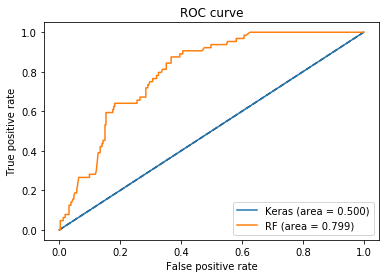

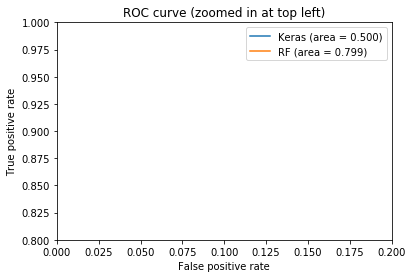

In [727]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [728]:
pred_y = model.predict_classes(test_X)
print(confusion_matrix(test_y, pred_y))
#TN FP
#FN TP

[[313   0]
 [ 64   0]]
